### Dummy Variables  

To use the categorical values for programming efficiently we create dummy variables.  

E.g., mother tongues of students in the class, ordered alphabetically, are:  
['Assamese', 'Bengali', 'Bhojpuri', 'Gujarati', 'Hindi', 'Kannada', 'Kodava Thak', 
 'Konkani', 'Maithili', 'Marathi', 'Rajasthani', 'Tamil', 'Telugu', 'Telugu ', 'Urdu']    
  
If we assign numeric values 1 to 15, their importance in ML will be biased.  

We create 14 (k-1) columns to indicate if the student speaks that language or not.   
Using k columns is called dummy variable trap.  

E.g., including both male (0 or 1) and female (1 or 0) dummy variables will cause redundancy  
because if a person is not male that person is a female.   
We don't need to use both the variables in regression models.  

A dummy variable is a binary variable that indicates whether a separate categorical variable takes on a specific value.  

Similar to **one-hot encoding**.  

In [2]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('../Data/BSc22A_Student_Data.xlsx')

#### Create dummy variable column for a single variable   
`pd.get_dummies(df, columns=[col])`   
kwarg: `drop_first=False`

In [5]:
df_ = df[['USN', 'Name', 'Sex']] #, 'Home_state', 'Home_town', 'Mother_tongue','Qualification', 'Branch']]
df_ = pd.get_dummies(df_, columns=['Sex'], drop_first=True) # .head()  #, drop_first=True)
print(df_)

              USN                   Name  Sex_M
0    1RVU22BSC002   Adithi Vaidyanathan   False
1    1RVU22BSC003           Adithiyaa N    True
2   1RVU22BSC004      Aditya Raj Aditya    True
3    1RVU22BSC006            Ajay Hegde    True
4    1RVU22BSC007        Akshay Kumar BP   True
5    1RVU22BSC008        Alaric Sequeria   True
6    1RVU22BSC011         Apoorva Hegde   False
7   1RVU22BSC020    Chayanika Choudhary   False
8    1RVU22BSC027               Dharshan   True
9    1RVU22BSC024            Denis Paul    True
10   1RVU22BSC028        Divya Jnanakshi  False
11   1RVU22BSC031          Zeba Fathima   False
12   1RVU22BSC037        Janak R Kumble    True
13  1RVU22BSC042          Khushi Naruka   False
14   1RVU22BSC044          Kishor Desai    True
15   1RVU22BSC049              Meghan D    True
16   1RVU22BSC054        Mohammed Ikram    True
17   1RVU22BSC056               Mourya K   True
18   1RVU22BSC060      Nandika Raj Varma  False
19   1RVU22BSC068           Phalguni S P

#### Create dummy variables for multiple columns

In [6]:
df1 = df[['USN', 'Name', 'Sex', 'Home_State','Mother_Tongue', 'Diet']] 
df1 = pd.get_dummies(df1, columns=['Sex', 'Diet', 'Home_State','Mother_Tongue'], drop_first=True)
df1.columns

Index(['USN', 'Name', 'Sex_M', 'Diet_Veg', 'Home_State_Assam',
       'Home_State_Assan', 'Home_State_Bihar', 'Home_State_Chhattisgarh',
       'Home_State_Karnataka', 'Home_State_Karnataka ', 'Home_State_Kerala',
       'Home_State_Maharashtra', 'Home_State_Rajasthan',
       'Home_State_Tamil Nadu', 'Home_State_Uttar Pradesh', 'Home_State_delhi',
       'Home_State_karnataka', 'Mother_Tongue_Bengali',
       'Mother_Tongue_Bhojpuri', 'Mother_Tongue_Gujarati',
       'Mother_Tongue_Hindi', 'Mother_Tongue_Kannada',
       'Mother_Tongue_Kodava Thak', 'Mother_Tongue_Konkani',
       'Mother_Tongue_Maithili', 'Mother_Tongue_Marathi',
       'Mother_Tongue_Rajasthani', 'Mother_Tongue_Tamil',
       'Mother_Tongue_Telugu', 'Mother_Tongue_Telugu ', 'Mother_Tongue_Urdu'],
      dtype='object')

In [7]:
print(df1.shape)


(34, 31)


In [ ]:
df1.columns

#### drop_first     
Results in k-1 dummy variable columns where k is the number of categories (states).  
The dropped column would have **reference variable**.  

Without `drop-first` it is the same as `one-hot` encoding.

In [9]:
df1 = pd.get_dummies(df1, columns=['Sex', 'Mother_tongue'], drop_first=True) 

KeyError: "None of [Index(['Sex', 'Mother_tongue'], dtype='object')] are in the [columns]"

Suppose we wanted to assess the relationship between household income and political affiliation (i.e., old_party, new_party, or no_party).  
The regression equation might be:

$$Income = b0 + b1X1+ b2X2$$

where b0, b1, and b2 are regression coefficients.   
X1 and X2 are defined as:

X1 = 1, if old_party; X1 = 0, otherwise.  
X2 = 1, if new_party; X2 = 0, otherwise.  
The value of the categorical variable that is not represented explicitly by a dummy variable is called the reference group.   
In this example, the reference group consists of no_party voters.

#### Sex vs. IQ   
[fictitious](https://en.wikipedia.org/wiki/Sex_differences_in_intelligence)   
Reasearch shows that women have higher emotional intelligence ability than men     
though there is no difference in IQ.  

In [10]:
from io import StringIO 
string = """ID,Score,IQ,Sex
1,93,125,Male
2,86,120,Female
3,96,115,Male
4,81,110,Female
5,92,105,Male
6,75,100,Female
7,84,95,Male
8,77,90,Female
9,73,85,Male
10,74,80,Female
"""
file = StringIO(string)
df = pd.read_csv(file)
df

,ID,Score,IQ,Sex
0,1,93,125,Male
1,2,86,120,Female
2,3,96,115,Male
3,4,81,110,Female
4,5,92,105,Male
5,6,75,100,Female
6,7,84,95,Male
7,8,77,90,Female
8,9,73,85,Male
9,10,74,80,Female


In [11]:
df1 = pd.get_dummies(df, columns=['Sex',], drop_first=True)
df1

,ID,Score,IQ,Sex_Male
0,1,93,125,True
1,2,86,120,False
2,3,96,115,True
3,4,81,110,False
4,5,92,105,True
5,6,75,100,False
6,7,84,95,True
7,8,77,90,False
8,9,73,85,True
9,10,74,80,False


$$ŷ = b0 + b1IQ + b2Sex\_Male$$  
where ŷ is the predicted value of the Test Score, IQ is the IQ score, X1 is the dummy variable representing Gender, and b0, b1, and b2 are regression coefficients.  

Values for IQ and X1 are known inputs from the data table. The only unknowns on the right side of the equation are the regression coefficients, which we will estimate through least-squares regression.

<Axes: >

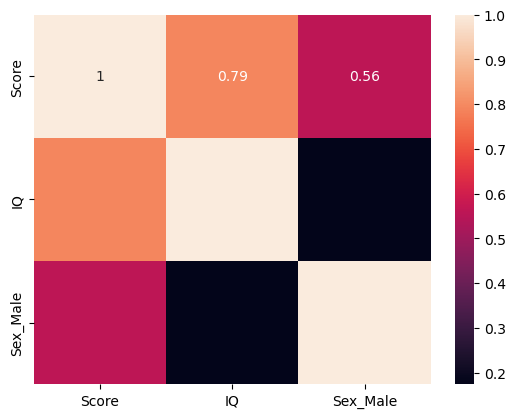

In [12]:
import seaborn as sns
sns.heatmap(df1[['Score','IQ','Sex_Male']].corr(), annot = True)

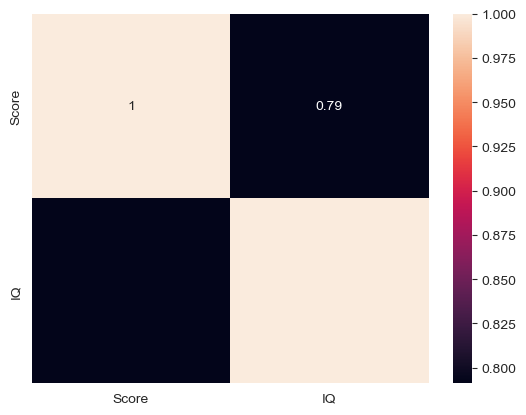

In [27]:
sns.heatmap(df1[['Score','IQ']].corr(), annot = True);

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [29]:
X = df1[['IQ','Sex_Male']]
y = df1['Score']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=100)
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [30]:
#Predicting the Test and Train set result 
y_pred= mlr.predict(x_test)  
x_pred= mlr.predict(x_train)

diff = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})

diff['Error'] = diff['Actual Value'] - diff['Predicted Value']
diff = diff.sort_values('Error').reset_index()
diff

,index,Actual Value,Predicted Value,Error
0,1,86,86.608696,-0.608696
1,6,84,83.173913,0.826087
2,7,77,73.826087,3.173913


#### Task   
Fit the model considering only IQ as feature and score as target.   
Check if there is any change in accuracy.  
Note: this dataset is very small.  